# **Intro to Data**
### *(using Python)*
*Presented by Columbia University Libraries*
***

Welcome to the Columbia University Library's Intro to Data using Python course! These are our objectives:

* Understanding what it *means* to use data
* How to think critically and work responsibly with imperfect data
* Fundamentals of data wrangling using Pandas
* Awareness of Python's statistical and visualization capabilities
*   Awareness of available datasets and where to find them
* An insatiable desire to learn more about using data!






## **Principles of data analysis**
***
No matter the context in which you're using data, there will **always** be a few principles you must follow. At the end of the day, you *are* doing science - you are using empirical observations to test hypotheses (and occasionally, to predict the future based on these hypotheses). Therefore, it is important to follow the same principles that guide scientific inquiry. These are in use far beyond academia. Regardless of where you work, whether a tech firm, bank, non-profit, or research institution, your analytical work **must** be:
1. Well-documented
2. Conscientious in reducing bias (the same way we randomize trials and only collect the data we need to answer a specific question, we have to make sure our data are clean, examined for potential bias, and are suited to the question we want to answer)
2. Reproducible (commenting and code sharing are crucial)
3. Responsibly and clearly communicated (you've done all the work, and now it's important to get it out in the world! Communicating the results of data analyses can be very difficult, especially to folks who don't have a background in it. It is your responsibility to do the best you can in stating what your research can and can't answer, and to make sure that any communication about the data comes from the data - don't make unfounded leaps, or allow others to)

Throughout this guide, you will see a subtitle for each section that shows you the *tool* we are using to perform each part of data analysis. This is to emphasize the greater importance of the *general concepts and principles* of data analysis that are constant across any language or context, rather than the tools used.

## **Getting started**
### *(with Google Colab)*

Topics to be covered:
1. What is Python?
2. Why does it matter?
3. How can you use Python? (IDEs, notebooks, terminal, Colab)
4. What are packages and why do we need them?
5. Basic familiarity with CoLab (shareability, power)
6. Pitfalls of using CoLab
7. Why pandas? Pandas is an open-source library that provides high-performance, easy-to-use data structures and data analysis tools for the Python programming language.


## **Data import and quality checking** 
### *(with Pandas)*
***
Topics to be covered, all demoed using NYC taxi dataset:

1. Importing csv, txt, excel files
2. Looking at (an extract) of the dataset (.head), assumptions about the data, and the data type for different fields + characteristics of each type
3. Data quality checking
4. The most common ways in which data are imperfect (missing data, duplication, truncation, misleading names)
5. Larger questions you should ask about your data (how was this collected? Is this helpful in answering the question I already have, or should I come up with new questions I can ask this particular data with confidence?)


In [0]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm

In [0]:
# Run following so that we can see all outputs, not just last
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [104]:
# Import file from github
url = "https://raw.githubusercontent.com/columbia-university-libraries-data-club/intro-to-data/master/taxi-data.csv"
taxi = pd.read_csv(url, index_col =  None, parse_dates = ["pickup", "dropoff"])
taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,total,payment_type,payment
0,2018-02-01 00:39:38,2018-02-01 00:39:41,1,0.00,20.0,3.00,23.00,1,Credit Card
1,2018-02-01 00:58:28,2018-02-01 01:05:35,5,1.60,7.5,0.88,9.68,1,Credit Card
2,2018-02-01 00:56:05,2018-02-01 01:18:54,1,9.60,28.5,5.96,35.76,1,Credit Card
3,2018-02-01 00:12:40,2018-02-01 00:15:50,1,0.73,4.5,0.00,5.80,2,Cash
4,2018-02-01 00:45:18,2018-02-01 00:51:56,2,1.87,8.0,0.00,9.30,2,Cash


We have our dataset loaded! Before we dive in, let's go over a few key data structures in python and pandas:

In [0]:
# Lists
listex = [1, 2, 3, 4, "python", "makes", "rory", "roar"]
listex[1]
listex[0:5]

# Iterable

In [0]:
# Dictionaries
dictex = {"rory" : "the lion", "columbia": "the university", "founded": 1754}
dictex["founded"]
dictex["rory"]

# Iterable

In [0]:
# Pandas dataframe
type(taxi)

# Think excel

In [0]:
# Pandas series
type(taxi["pickup"])

# Column

pandas.core.series.Series

In [0]:
# What are the data types of our fields?
taxi.dtypes

pickup          datetime64[ns]
dropoff         datetime64[ns]
passengers               int64
distance               float64
fare                   float64
tip                    float64
total                  float64
payment_type             int64
payment                 object
dtype: object

In [0]:
# Descriptions
taxi.describe(include = "all")

,pickup,dropoff,passengers,distance,fare,tip,total,payment_type,payment
count,769940,769940,769940.000000,769940.000000,769940.000000,769940.000000,769940.000000,769940.000000,769940
unique,634690,633445,NaN,NaN,NaN,NaN,NaN,NaN,5
top,2018-02-03 15:15:19,2018-02-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Credit Card
freq,16,46,NaN,NaN,NaN,NaN,NaN,NaN,420696
first,2008-12-31 20:31:59,2008-12-31 20:44:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2081-06-24 17:40:37,2081-06-24 18:42:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.356391,2.725387,11.882591,1.040139,14.156694,1.462002,NaN
std,NaN,NaN,1.033778,2.882936,9.745038,1.821846,10.707214,0.519115,NaN
min,NaN,NaN,0.000000,0.000000,-400.000000,-14.190000,-400.000000,1.000000,NaN
25%,NaN,NaN,1.000000,1.000000,6.000000,0.000000,7.800000,1.000000,NaN


**What are some observations you can make from the table above?**

Let's go column by column:

*Pick-up and drop-off dates and times:*
* The earliest date in our dataset is 12/31/2008
* The maximum date looks unrealistic (2081?)
* There are nearly 770,000 rows in our dataset, but only about 630,000 unique pickup and dropoff values. Why? Why would there be fewer unique dropoff than pickup date values?

*Moving onto passengers and distance:*
* What does having zero passengers mean?
* What does having zero distance mean?
* Are these distance values intuitive?

*Fares and payment:*
* Why would there be a negative number for a fare or tip?
* What does the column "payment type" mean here, and why is it numeric?
* There was a $2,600 cab ride? Was that a mistake?

Luckily, we can take a deeper dive into questions!

Let's start with pick-up and drop-off times:





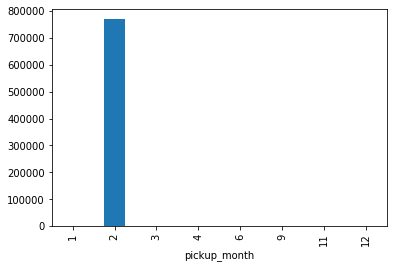

In [0]:
# Start with a simple histogram
taxi["pickup_month"] = taxi["pickup"].dt.month

# First with months
taxi.groupby("pickup_month")["pickup"].count().plot(kind="bar")

In [0]:
# Then with dates
taxi.groupby("pickup")["pickup"].count().plot(kind = "bar")

You'll notice that the above takes *forever*. Why is this?

Because we're working on 770,000 rows of data! And this particular visualization is trying to account for every single point, which in this case is every single pickup date and time. This is one of the first hurdles you will likely experience when working with large and interesting datasets. So, what can you do to analyze the data more quickly?

* Subset the data
* Select a random sample
* Use only the information needed 

But almost all of these require working with the data in a form other than the one it's in already. This brings us to:

## **Data wrangling**
### *(using Pandas)*
***
Topics to be covered:
1. Math and string operations between columns 
2. Summarizing
aside: + you can and should define your own functions (we said that code should be reproducible - if others are using your code or looking at it, functions are a good way to keep things in order)
3. Reshaping
4. Merging (will need to find another dataset to merge with)



,pickup,dropoff,passengers,distance,fare,tip,total,payment_type,payment,pickup_year
0,2018-02-01 00:39:38,2018-02-01 00:39:41,1,0.00,20.0,3.00,23.00,1,Credit Card,2018
1,2018-02-01 00:58:28,2018-02-01 01:05:35,5,1.60,7.5,0.88,9.68,1,Credit Card,2018
2,2018-02-01 00:56:05,2018-02-01 01:18:54,1,9.60,28.5,5.96,35.76,1,Credit Card,2018
3,2018-02-01 00:12:40,2018-02-01 00:15:50,1,0.73,4.5,0.00,5.80,2,Cash,2018
4,2018-02-01 00:45:18,2018-02-01 00:51:56,2,1.87,8.0,0.00,9.30,2,Cash,2018


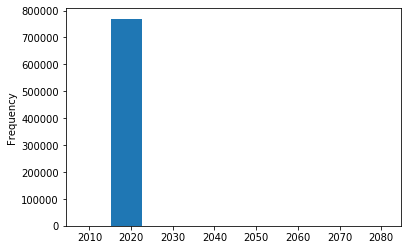

In [105]:
# Let's go ahead and first try to look at just the year of the pickup to see 
# what the deal with those 2081 dates is:

taxi["pickup_year"] = taxi["pickup"].dt.year
taxi.head()
taxi["pickup_year"].plot(kind = "hist")

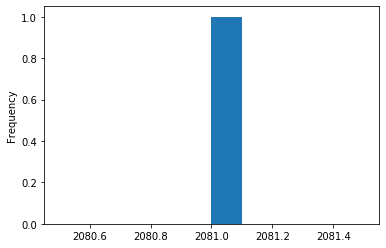

In [106]:
# So, we can see that most of these entries seem to be near the 2018 range, but that there must be 
# a few entries that are near 2080 that are causing the graph to stretch out.
# So, we will try to look only at those rows where year > 2018 and see what we get.

# Let's go ahead and first try to look at just the year of the pickup to see 
# what the deal with those 2081 dates is:

taxi[taxi["pickup_year"] > 2018]["pickup_year"].plot(kind = "hist")


In [0]:
# Interesting! It looks like there's just one row here that has a strange date.
# Let's pull it up.

taxi[taxi["pickup_year"] > 2018].head()


,pickup,dropoff,passengers,distance,fare,tip,total,payment_type,payment,pickup_month,pickup_year
734222,2081-06-24 17:40:37,2081-06-24 18:42:47,1,16.95,52.0,0.0,55.96,1,Credit Card,6,2081


Other than the date, it doesn't look like there's anything wrong with this row. What do we do?
* Fix the date, or
* Drop the row?

Since we have about 770,000 other rows, let's drop this one.

In [107]:
taxi = taxi[taxi["pickup_year"] < 2019]
taxi.describe(include = "all")

,pickup,dropoff,passengers,distance,fare,tip,total,payment_type,payment,pickup_year
count,769939,769939,769939.000000,769939.000000,769939.000000,769939.000000,769939.000000,769939.000000,769939,769939.000000
unique,634689,633444,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,2018-02-03 15:15:19,2018-02-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Credit Card,NaN
freq,16,46,NaN,NaN,NaN,NaN,NaN,NaN,420695,NaN
first,2008-12-31 20:31:59,2008-12-31 20:44:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-12-02 10:38:49,2018-12-02 10:38:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.356392,2.725368,11.882539,1.040140,14.156639,1.462003,NaN,2017.998400
std,NaN,NaN,1.033779,2.882892,9.744937,1.821847,10.707115,0.519115,NaN,0.117511
min,NaN,NaN,0.000000,0.000000,-400.000000,-14.190000,-400.000000,1.000000,NaN,2008.000000
25%,NaN,NaN,1.000000,1.000000,6.000000,0.000000,7.800000,1.000000,NaN,2018.000000


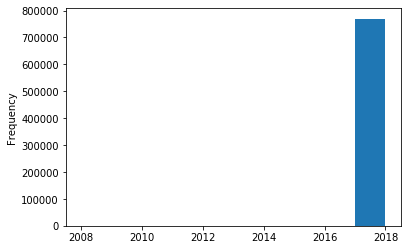

In [0]:
taxi["pickup_year"].plot(kind = "hist")

Wait a minute, it looks like the minimum year is 2008, but that the majority of trips are in 2018. What's going on here?

In [0]:
taxi[taxi["pickup_year"] < 2018].head()

,pickup,dropoff,passengers,distance,fare,tip,total,payment_type,payment,pickup_month,pickup_year
176917,2009-01-01 10:30:58,2009-01-01 11:27:08,1,31.73,84.5,0.00,87.46,1,Credit Card,1,2009
183630,2009-01-01 00:02:57,2009-01-01 15:29:58,1,4.36,15.5,2.44,20.69,1,Credit Card,1,2009
205807,2010-09-23 01:01:27,2010-09-23 12:47:19,1,3.90,18.0,0.00,18.80,2,Cash,9,2010
228185,2010-09-23 00:56:57,2010-09-23 01:03:03,1,0.72,4.5,0.00,5.30,2,Cash,9,2010
271674,2010-09-23 01:28:02,2010-09-23 01:36:15,1,1.03,7.0,0.00,7.80,2,Cash,9,2010


Okay...there are a lot of these, compared to just one entry from 2081. However, this is not something we could have figured out by the histogram, and we don't know how many such rows there are. How can we get a sense of how many entries are from before 2018?
* Make a plot (tried above) 
* List the rows (tried above)
* Count!

In [0]:
# Count rows where year < 2018
taxi[taxi["pickup_year"] < 2018].count()

pickup          144
dropoff         144
passengers      144
distance        144
fare            144
tip             144
total           144
payment_type    144
payment         144
pickup_month    144
pickup_year     144
dtype: int64

Whoa, there are 144 such rows! How do we proceed?
* We can drop them
* We can investigate them further to see if there's something in common with them
* We can change the year and assume 2018

Let's investigate!

array([2018, 2009, 2010, 2008])

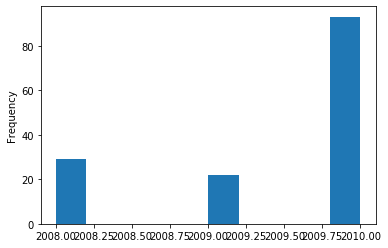

In [0]:
# What are the summary stats of these rows and do they differ from the other data?
taxi["pickup_year"].unique() 


taxi[taxi["pickup_year"] < 2018]["pickup_year"].plot(kind = "hist")

In [0]:
# Describe these early-year rows
taxi[taxi["pickup_year"] < 2018].describe(include = "all")

,pickup,dropoff,passengers,distance,fare,tip,total,payment_type,payment,pickup_month,pickup_year
count,144,144,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144,144.000000,144.000000
unique,142,143,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,2010-09-23 01:11:49,2009-01-01 00:10:05,NaN,NaN,NaN,NaN,NaN,NaN,Cash,NaN,NaN
freq,2,2,NaN,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
first,2008-12-31 20:31:59,2008-12-31 20:44:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2010-09-23 23:41:53,2010-09-24 00:07:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.305556,3.002014,12.493056,0.514861,14.499653,1.805556,NaN,8.381944,2009.444444
std,NaN,NaN,0.804513,3.915271,10.883038,1.617231,11.753528,0.414388,NaN,3.359563,0.808848
min,NaN,NaN,1.000000,0.010000,-4.500000,0.000000,-6.300000,1.000000,NaN,1.000000,2008.000000
25%,NaN,NaN,1.000000,1.002500,6.375000,0.000000,7.800000,2.000000,NaN,9.000000,2009.000000


In [0]:
# Compare with rows from 2018
taxi[taxi["pickup_year"] >= 2018].describe(include = "all")

,pickup,dropoff,passengers,distance,fare,tip,total,payment_type,payment,pickup_month,pickup_year
count,769795,769795,769795.000000,769795.000000,769795.000000,769795.000000,769795.000000,769795.000000,769795,769795.000000,769795.0
unique,634547,633301,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
top,2018-02-03 15:15:19,2018-02-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Credit Card,NaN,NaN
freq,16,46,NaN,NaN,NaN,NaN,NaN,NaN,420666,NaN,NaN
first,2018-01-31 16:45:38,2018-01-31 17:00:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-12-02 10:38:49,2018-12-02 10:38:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.356401,2.725317,11.882425,1.040238,14.156575,1.461939,NaN,2.000221,2018.0
std,NaN,NaN,1.033817,2.882665,9.744716,1.821870,10.706917,0.519111,NaN,0.035825,0.0
min,NaN,NaN,0.000000,0.000000,-400.000000,-14.190000,-400.000000,1.000000,NaN,1.000000,2018.0
25%,NaN,NaN,1.000000,1.000000,6.000000,0.000000,7.800000,1.000000,NaN,2.000000,2018.0


In [0]:
# From these basic summarizations (not testing for significance), 
# it looks like these rows aren't too different from the post-2018 rows - 
# so it's probably safe to go ahead and drop them.

taxi = taxi[taxi["pickup_year"] >= 2018]

Now that we've got the general hang of cleaning data, let's go ahead and clean up the anomalies in passenger number, distance, fare, and payment.

,passengers,distance,fare,tip,total,payment_type,pickup_year
count,769795.000000,769795.000000,769795.000000,769795.000000,769795.000000,769795.000000,769795.0
mean,1.356401,2.725317,11.882425,1.040238,14.156575,1.461939,2018.0
std,1.033817,2.882665,9.744716,1.821870,10.706917,0.519111,0.0
min,0.000000,0.000000,-400.000000,-14.190000,-400.000000,1.000000,2018.0
25%,1.000000,1.000000,6.000000,0.000000,7.800000,1.000000,2018.0
50%,1.000000,1.750000,9.000000,0.000000,11.150000,1.000000,2018.0
75%,1.000000,3.370000,14.500000,1.760000,17.000000,2.000000,2018.0
max,9.000000,120.470000,2624.500000,104.000000,2626.300000,5.000000,2018.0


passengers
0       764
1    650783
2     59942
3     13122
4      5221
5     26597
6     13335
7        13
8        14
9         4
Name: passengers, dtype: int64

,passengers,distance,fare,tip,total,payment_type,pickup_year
count,769031.000000,769031.000000,769031.000000,769031.000000,769031.000000,769031.000000,769031.0
mean,1.357749,2.725790,11.883368,1.040389,14.157895,1.461768,2018.0
std,1.033446,2.882719,9.744868,1.822043,10.707088,0.518883,0.0
min,1.000000,0.000000,-400.000000,-14.190000,-400.000000,1.000000,2018.0
25%,1.000000,1.000000,6.000000,0.000000,7.800000,1.000000,2018.0
50%,1.000000,1.750000,9.000000,0.000000,11.150000,1.000000,2018.0
75%,1.000000,3.370000,14.500000,1.760000,17.000000,2.000000,2018.0
max,9.000000,120.470000,2624.500000,104.000000,2626.300000,5.000000,2018.0


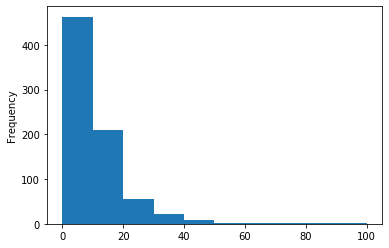

In [109]:
# Cleaning for passengers, distance, fare, and payment
taxi.describe()

# Cleaning passengers
taxi.groupby("passengers")["passengers"].count()

# There are a few rides with zero passengers, which seems suspect. Let's drop.
# (We could have also investigated what the fare is for these rides:)
taxi[taxi["passengers"] == 0]["fare"].plot(kind = "hist")
# This shows that many of these do have some nonzero fare - so they're 
# definitely suspect, and also irrelevant to the questions we want to ask.
taxi = taxi[taxi["passengers"] > 0]
taxi.describe()

In [0]:
# Cleaning for distance, fare, payment
taxi.describe()

# Remove trips with 0 distance, after checking how many there are
# Here, it might be good to have a dummy variable rather than plotting a
# histogram or table with all values
taxi["distance"].groupby([taxi["distance"] == 0]).count()

# Looks like these represent just 7.6k values, let's drop
# In another world we could try to interpolate these values using fare,
# but these are not relevant to our research question.

,passengers,distance,fare,tip,total,payment_type,pickup_month,pickup_year
count,769031.000000,769031.000000,769031.000000,769031.000000,769031.000000,769031.000000,769031.000000,769031.0
mean,1.357749,2.725790,11.883368,1.040389,14.157895,1.461768,2.000221,2018.0
std,1.033446,2.882719,9.744868,1.822043,10.707088,0.518883,0.035843,0.0
min,1.000000,0.000000,-400.000000,-14.190000,-400.000000,1.000000,1.000000,2018.0
25%,1.000000,1.000000,6.000000,0.000000,7.800000,1.000000,2.000000,2018.0
50%,1.000000,1.750000,9.000000,0.000000,11.150000,1.000000,2.000000,2018.0
75%,1.000000,3.370000,14.500000,1.760000,17.000000,2.000000,2.000000,2018.0
max,9.000000,120.470000,2624.500000,104.000000,2626.300000,5.000000,12.000000,2018.0


distance
False    761375
True       7656
Name: distance, dtype: int64

In [110]:
taxi = taxi[taxi["distance"] > 0]
taxi["distance"].describe()

count    761375.000000
mean          2.753199
std           2.884124
min           0.010000
25%           1.010000
50%           1.770000
75%           3.400000
max         120.470000
Name: distance, dtype: float64

In [111]:
# Looks like there is in fact at least one trip that had a distance traveled of 
# 0.01. Is this reasonable? Should we have used a higher cutoff than 0?
# Let's calculate in feet!
0.01 * 5280 # number of feet in a mile
# Ok, does it make sense to have a trip that was only 52 feet long?
# One NYC block (north-south) is 264 feet. How many miles is this?
264 / 5280
# 0.05 miles! Let's make this the new cutoff.
taxi = taxi[taxi["distance"] > 0.05]
taxi["distance"].describe()

52.800000000000004

0.05

count    759064.000000
mean          2.761502
std           2.884577
min           0.060000
25%           1.010000
50%           1.780000
75%           3.400000
max         120.470000
Name: distance, dtype: float64

In [0]:
# Cleaning the fare and tip fields
# Multiple choice - which one of these WILL work?
# A - taxi["fare, tip"].describe()
# B - taxi["fare", "tip"].describe()
# C - taxi[["fare", "tip"]].describe()



In [0]:
taxi[["fare", "tip"]].describe()

,fare,tip
count,759064.000000,759064.000000
mean,11.905920,1.044487
std,9.019236,1.792245
min,-150.000000,-1.200000
25%,6.000000,0.000000
50%,9.000000,0.000000
75%,14.500000,1.760000
max,628.000000,100.000000


In [0]:
# Drop negative fares since these look like refunds
# In a transactions database, why would this not be a good idea?
# Should the threshold be higher? What is the base fare for an NYC taxi?

taxi = taxi[taxi["fare"] > 2.5]

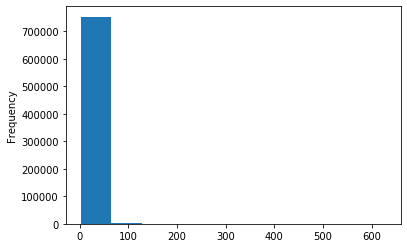

In [0]:
taxi["fare"].plot(kind = "hist")

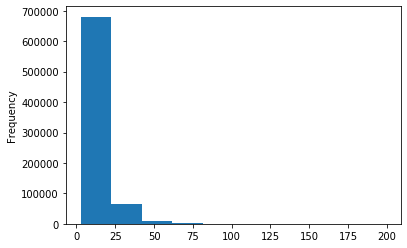

In [113]:
# Dropping far-off fares because they do not seem to be representative
taxi = taxi[taxi["fare"] < 200]
taxi["fare"].plot(kind = "hist")

In [0]:
taxi["tip"].describe()

count    755084.000000
mean          1.048845
std           1.788275
min           0.000000
25%           0.000000
50%           0.000000
75%           1.800000
max         100.000000
Name: tip, dtype: float64

In [0]:
# Tip seems to be okay - no negative values!

Now for the fun part: let's ask questions!

- Let's investigate the potential effects of increasing the number of people in a taxi. Does it affect how likely and how much someone is to tip? Does it relate to how far they travel?
- I'm nosy, so I also want to know - how much do people generally tip?
- Are there differences in volume of passengers during different times of day? 
- What about payment type - who is still using cash, and at what time of day? Are they groups?


In [114]:
# Creating a function and applying it to a pandas series
def pass_sort(row):
  if row['passengers'] > 3:
      return 'Four or more'
  if row['passengers'] > 1:
      return 'Two to three'
  if row['passengers'] == 1:
      return 'One'

taxi["passenger_type"] = taxi.apply(lambda row: pass_sort(row), axis = 1)

# Use column manipulation to create new columns
taxi["tip_pct"] = taxi['tip'] / taxi['fare']
taxi["pickup_time"] = taxi["pickup"].dt.time
taxi.head()

# Reshaping data
taxi_pivot = taxi.pivot(columns = "passenger_type", values = ["pickup_time", "tip_pct"])



,pickup,dropoff,passengers,distance,fare,tip,total,payment_type,payment,pickup_year,passenger_type,tip_pct,pickup_time
1,2018-02-01 00:58:28,2018-02-01 01:05:35,5,1.60,7.5,0.88,9.68,1,Credit Card,2018,Four or more,0.117333,00:58:28
2,2018-02-01 00:56:05,2018-02-01 01:18:54,1,9.60,28.5,5.96,35.76,1,Credit Card,2018,One,0.209123,00:56:05
3,2018-02-01 00:12:40,2018-02-01 00:15:50,1,0.73,4.5,0.00,5.80,2,Cash,2018,One,0.000000,00:12:40
4,2018-02-01 00:45:18,2018-02-01 00:51:56,2,1.87,8.0,0.00,9.30,2,Cash,2018,Two to three,0.000000,00:45:18
5,2018-02-01 00:30:57,2018-02-01 00:52:23,2,5.69,20.0,0.00,21.30,2,Cash,2018,Two to three,0.000000,00:30:57


In [115]:
# Can also use transform to add a column (like R mutate)
taxi["rec"] = 1
taxi["medtippct"] = taxi.groupby("rec")["tip_pct"].transform('median')
# Transform must have a grouping variable

# And can also use transform and apply to add a column and make a comparison 
# at the same time
taxi["above_medtippct"] = taxi["tip_pct"].transform(lambda x: x > x.median())

taxi[["tip_pct", "medtippct", "above_medtippct"]].head()



,tip_pct,medtippct,above_medtippct
1,0.117333,0.0,True
2,0.209123,0.0,True
3,0.000000,0.0,False
4,0.000000,0.0,False
5,0.000000,0.0,False


In [116]:
taxi_pivot.head()

pickup_time            ...   tip_pct             
passenger_type Four or more       One  ...       One Two to three
1                  00:58:28       NaN  ...       NaN          NaN
2                       NaN  00:56:05  ...  0.209123          NaN
3                       NaN  00:12:40  ...         0          NaN
4                       NaN       NaN  ...       NaN            0
5                       NaN       NaN  ...       NaN            0

[5 rows x 6 columns]

In [121]:
# Collapse to find average pickup time and tip_pct
taxi_pivot["tip_pct"].aggregate("median")
taxi_pivot["tip_pct"].aggregate("mean")

passenger_type
Four or more    0.0
One             0.0
Two to three    0.0
dtype: float64

passenger_type
Four or more    0.095923
One             0.092599
Two to three    0.092067
dtype: float64

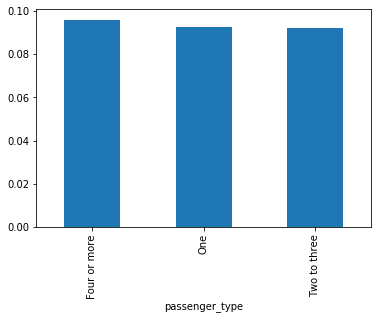

In [122]:
taxi_pivot["tip_pct"].aggregate("mean").plot(kind = "bar")

Text(0.5, 1.0, 'Passengers vs distance')

Text(0.5, 0, 'Passenger number')

Text(0, 0.5, 'Distance (mi)')

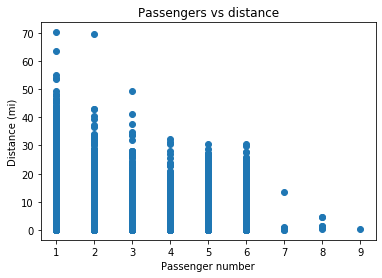

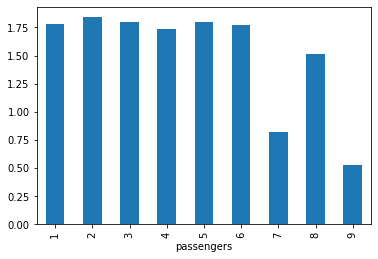

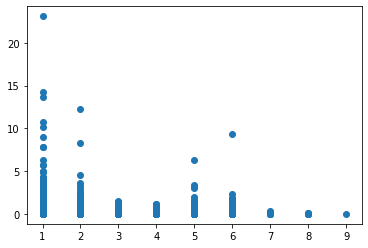

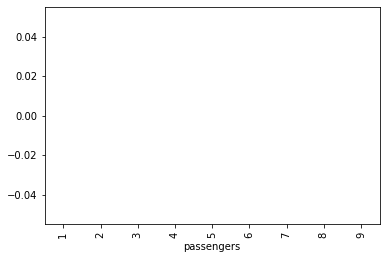

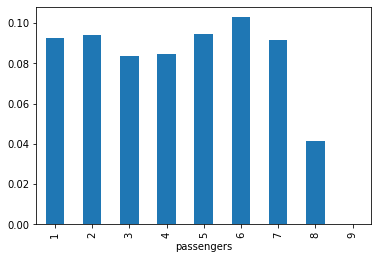

In [125]:
# Visualize tip percent and distance by passenger number

plt.scatter(x = taxi["passengers"], y = taxi["distance"])
plt.title('Passengers vs distance')
plt.xlabel('Passenger number')
plt.ylabel('Distance (mi)')
plt.show()

taxi.groupby("passengers")["distance"].median().plot(kind = "bar")
plt.show()

plt.scatter(x = taxi["passengers"], y = taxi["tip_pct"])
plt.show()

taxi.groupby("passengers")["tip_pct"].aggregate("median").plot(kind = "bar")
plt.show()

taxi.groupby("passengers")["tip_pct"].aggregate("mean").plot(kind = "bar")
plt.show()

In [126]:
# Import holiday data for merge
url = "https://raw.githubusercontent.com/columbia-university-libraries-data-club/intro-to-data/master/usholidays.csv"

holidays = pd.read_csv(url, parse_dates=["Date"])
holidays.dtypes

Unnamed: 0             int64
Date          datetime64[ns]
Holiday               object
dtype: object

In [127]:
holidays.head()

,Unnamed: 0,Date,Holiday
0,0,2010-12-31,New Year's Day
1,1,2011-01-17,"Birthday of Martin Luther King, Jr."
2,2,2011-02-21,Washington's Birthday
3,3,2011-05-30,Memorial Day
4,4,2011-07-04,Independence Day


In [139]:
# Clean up taxis dataset to create date (not datetime) variable to merge on
taxi["pickup_month"] = taxi["pickup"].dt.month
taxi.groupby("pickup_month")["pickup_month"].count()

pickup_month
1         14
2     754978
3         74
4          8
11         7
12         3
Name: pickup_month, dtype: int64

In [141]:
taxi["pickup_date"] = taxi["pickup"].dt.date
taxi.groupby("pickup_date")["pickup_date"].count()

pickup_date
2018-01-31       14
2018-02-01    27545
2018-02-02    33337
2018-02-03    30674
2018-02-04    24825
2018-02-05    25189
2018-02-06    25225
2018-02-07    26125
2018-02-08    27993
2018-02-09    30707
2018-02-10    30134
2018-02-11    22783
2018-02-12    24370
2018-02-13    25265
2018-02-14    28799
2018-02-15    27630
2018-02-16    30398
2018-02-17    30336
2018-02-18    23207
2018-02-19    22431
2018-02-20    22817
2018-02-21    25174
2018-02-22    28176
2018-02-23    30317
2018-02-24    31031
2018-02-25    24985
2018-02-26    24316
2018-02-27    24793
2018-02-28    26396
2018-03-01       24
2018-03-02        3
2018-03-03        3
2018-03-04        2
2018-03-05        3
2018-03-08        4
2018-03-09        3
2018-03-10        2
2018-03-11        4
2018-03-12        2
2018-03-13        1
2018-03-15        2
2018-03-16        3
2018-03-17        4
2018-03-18        3
2018-03-19        2
2018-03-20        3
2018-03-23        2
2018-03-30        4
2018-04-07        1
2018-04-

In [144]:
taxi.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
total                     float64
payment_type                int64
payment                    object
pickup_year                 int64
passenger_type             object
tip_pct                   float64
pickup_time                object
rec                         int64
medtippct                 float64
above_medtippct              bool
pickup_month                int64
pickup_date                object
dtype: object

In [0]:
import datetime as datetime

In [0]:
taxi["pickup_date_d"] = datetime.datetime.date(taxi["pickup"])

In [0]:
# Merge with taxi dataset
taxihol = pd.merge(taxi, holidays, how = "left", left_on = "pickup_date", right_on = "Date")

In [133]:
taxihol[taxihol["Holiday"].isna() == False].head()

,pickup,dropoff,passengers,distance,fare,tip,total,payment_type,payment,pickup_year,passenger_type,tip_pct,pickup_time,rec,medtippct,above_medtippct,Unnamed: 0,Date,Holiday


In [0]:
taxi = taxi[taxi["pickup_month"] == 2]

### **Next time: Statistical analysis and visualization!**
### *(with pandas and matplotlib)*
***
Topics to be covered:
1. Correlation, regression (only do two simple examples, and then point to cheat sheet with rest of potential tests + packages) - make sure to point out that had they not cleaned the data results would have been quite different
2. Plotting (two simple examples, then show cheat sheet with all different possiblities)

Now that we've cleaned up our data, let's ask a few questions! What are some variables that might be related?
- Time of day and number of pickups
- Time of day and tip percent
- Passenger number and tip percent
- Passenger number and distance

To answer questions about relationships, there are a few easy methods we can use:
- visualization
- correlation coefficients
- t-tests

You can do statistical testing quite easily using statsmodel!

## **Where to find data**
### *(using CU Libraries, Google datasets, US government agencies, and many more)*
1. Types of data: tabular (survey, transaction, summary, etc.), geospatial, text
2. List of potential sources for each of the above
3. Tools to collect your own data (mTurk or qualtrics for survey data, scraping for text data)

## **Topics not covered today**
***
A list of all the topics that you can dive deeper into (asterisks are by the ones that are most important):
- github*
- statistics*
- communication / translation*
- visualization*
- NLP
- ML
- Cloud computing + access
- geospatial data
- applications